In [31]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

In [32]:
data=pd.read_csv("dataset.csv")
data.head()

,name,description,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,Unnamed: 16,price
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,NaN,74600.0
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,NaN,50170.0
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,NaN,96410.0
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,NaN,46835.0
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,NaN,81663.0


In [33]:
del data['description']
del data['Unnamed: 16']

In [34]:
data.head()
data.columns = data.columns.str.replace(r'[<>\\/\[\]]', '', regex=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   make            1002 non-null   object 
 2   model           1002 non-null   object 
 3   year            1002 non-null   int64  
 4   engine          1000 non-null   object 
 5   cylinders       897 non-null    float64
 6   fuel            995 non-null    object 
 7   mileage         968 non-null    float64
 8   transmission    1000 non-null   object 
 9   trim            1001 non-null   object 
 10  body            999 non-null    object 
 11  doors           995 non-null    float64
 12  exterior_color  997 non-null    object 
 13  interior_color  964 non-null    object 
 14  drivetrain      1002 non-null   object 
 15  price           979 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 125.4+ KB


In [35]:
data=data.dropna(axis=0)
data.info()
data = data.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
data

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 1001
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            800 non-null    object 
 1   make            800 non-null    object 
 2   model           800 non-null    object 
 3   year            800 non-null    int64  
 4   engine          800 non-null    object 
 5   cylinders       800 non-null    float64
 6   fuel            800 non-null    object 
 7   mileage         800 non-null    float64
 8   transmission    800 non-null    object 
 9   trim            800 non-null    object 
 10  body            800 non-null    object 
 11  doors           800 non-null    float64
 12  exterior_color  800 non-null    object 
 13  interior_color  800 non-null    object 
 14  drivetrain      800 non-null    object 
 15  price           800 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 106.2+ KB


C:\Users\Avijit\AppData\Local\Temp\ipykernel_13288\1405170329.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)


,name,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price
0,2024JeepWagoneerSeriesII,Jeep,Wagoneer,2024,24VGDIDOHCTwinTurbo,6.0,Gasoline,10.0,8-SpeedAutomatic,SeriesII,SUV,4.0,White,GlobalBlack,Four-wheelDrive,74600.0
1,2024JeepGrandCherokeeLaredo,Jeep,GrandCherokee,2024,OHV,6.0,Gasoline,1.0,8-SpeedAutomatic,Laredo,SUV,4.0,Metallic,GlobalBlack,Four-wheelDrive,50170.0
2,2024GMCYukonXLDenali,GMC,YukonXL,2024,"6.2LV-8gasolinedirectinjection,variablevalvecontr",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,SummitWhite,Teak/LightShale,Four-wheelDrive,96410.0
3,2023DodgeDurangoPursuit,Dodge,Durango,2023,16VMPFIOHV,8.0,Gasoline,32.0,8-SpeedAutomatic,Pursuit,SUV,4.0,WhiteKnuckleClearcoat,Black,All-wheelDrive,46835.0
4,2024RAM3500Laramie,RAM,3500,2024,24VDDIOHVTurboDiesel,6.0,Diesel,10.0,6-SpeedAutomatic,Laramie,PickupTruck,4.0,Silver,Black,Four-wheelDrive,81663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024Mercedes-BenzSprinter2500StandardRoof,Mercedes-Benz,Sprinter2500,2024,16VDDIDOHCTurboDiesel,4.0,Diesel,10.0,9-SpeedAutomatic,StandardRoof,CargoVan,3.0,ArcticWhite,Black,Rear-wheelDrive,59037.0
998,2024DodgeHornetHornetR/TPlusEawd,Dodge,Hornet,2024,"4gasolinedirectinjection,DOHC,Multiairvariable...",4.0,Gasoline,0.0,6-SpdAisinF21-250PHEVAutoTrans,HornetR/TPlusEawd,SUV,4.0,AcapulcoGold,Black,All-wheelDrive,49720.0
999,2024JeepWagoneerBase,Jeep,Wagoneer,2024,24VGDIDOHCTwinTurbo,6.0,Gasoline,20.0,8-SpeedAutomatic,Base,SUV,4.0,DiamondBlack,Black,Four-wheelDrive,69085.0
1000,2024NissanMuranoSVIntelligentAWD,Nissan,Murano,2024,"6DOHC,variablevalvecontrol,regularunleaded,engine",6.0,Gasoline,6.0,Automatic,SVIntelligentAWD,SUV,4.0,PearlWhiteTricoat,Graphite,All-wheelDrive,43495.0


In [36]:
nameencoder=LabelEncoder()
makeencoder=LabelEncoder()
modelencoder=LabelEncoder()
engineencoder=LabelEncoder()
fuelencoder=LabelEncoder()
transmissionencoder=LabelEncoder()
trimencoder=LabelEncoder()
bodyencoder=LabelEncoder()
extcencoder=LabelEncoder()
intcencoder=LabelEncoder()
drivetrainencoder=LabelEncoder()


In [37]:
data['name']=nameencoder.fit_transform(data['name'])
jb.dump(nameencoder,"encoders/nameencoder.pkl")

data['make'] = makeencoder.fit_transform(data['make'])
jb.dump(makeencoder, "encoders/makeencoder.pkl")

data['model'] = modelencoder.fit_transform(data['model'])
jb.dump(modelencoder, "encoders/modelencoder.pkl")

data['engine'] = engineencoder.fit_transform(data['engine'])
jb.dump(engineencoder, "encoders/engineencoder.pkl")

data['fuel'] = fuelencoder.fit_transform(data['fuel'])
jb.dump(fuelencoder, "encoders/fuelencoder.pkl")

data['transmission'] = transmissionencoder.fit_transform(data['transmission'])
jb.dump(transmissionencoder, "encoders/transmissionencoder.pkl")

data['trim'] = trimencoder.fit_transform(data['trim'])
jb.dump(trimencoder, "encoders/trimencoder.pkl")

data['body'] = bodyencoder.fit_transform(data['body'])
jb.dump(bodyencoder, "encoders/bodyencoder.pkl")

data['exterior_color'] = extcencoder.fit_transform(data['exterior_color'])
jb.dump(extcencoder, "encoders/extcencoder.pkl")

data['interior_color'] = intcencoder.fit_transform(data['interior_color'])
jb.dump(intcencoder, "encoders/intcencoder.pkl")

data['drivetrain'] = drivetrainencoder.fit_transform(data['drivetrain'])
jb.dump(drivetrainencoder, "encoders/drivetrainencoder.pkl")

['encoders/drivetrainencoder.pkl']

In [38]:

numcol=data.select_dtypes(include=['number']).columns.tolist()
pipe1=Pipeline(steps=[("MISSING VALUE",SimpleImputer(strategy='mean'))])
preprocessor=ColumnTransformer(transformers=[("numeric",pipe1,numcol)])
numcol
data


,name,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price
0,178,12,110,2024,23,6.0,4,10.0,14,126,6,4.0,223,31,1,74600.0
1,170,12,44,2024,62,6.0,4,1.0,14,71,6,4.0,123,31,1,50170.0
2,121,8,119,2024,42,8.0,4,0.0,27,41,6,4.0,210,69,1,96410.0
3,6,6,26,2023,13,8.0,4,32.0,14,93,6,4.0,225,5,0,46835.0
4,247,20,2,2024,19,6.0,0,10.0,6,68,5,4.0,182,5,1,81663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,219,18,93,2024,5,4.0,0,10.0,22,135,0,3.0,10,5,3,59037.0
998,76,6,49,2024,37,4.0,4,0.0,4,59,6,4.0,4,5,0,49720.0
999,174,12,110,2024,23,6.0,4,20.0,14,34,6,4.0,70,5,1,69085.0
1000,230,19,58,2024,46,6.0,4,6.0,27,117,6,4.0,146,32,0,43495.0


In [39]:
x=preprocessor.fit_transform(data)
data=pd.DataFrame(x,columns=numcol)
data

,name,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price
0,178.0,12.0,110.0,2024.0,23.0,6.0,4.0,10.0,14.0,126.0,6.0,4.0,223.0,31.0,1.0,74600.0
1,170.0,12.0,44.0,2024.0,62.0,6.0,4.0,1.0,14.0,71.0,6.0,4.0,123.0,31.0,1.0,50170.0
2,121.0,8.0,119.0,2024.0,42.0,8.0,4.0,0.0,27.0,41.0,6.0,4.0,210.0,69.0,1.0,96410.0
3,6.0,6.0,26.0,2023.0,13.0,8.0,4.0,32.0,14.0,93.0,6.0,4.0,225.0,5.0,0.0,46835.0
4,247.0,20.0,2.0,2024.0,19.0,6.0,0.0,10.0,6.0,68.0,5.0,4.0,182.0,5.0,1.0,81663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,219.0,18.0,93.0,2024.0,5.0,4.0,0.0,10.0,22.0,135.0,0.0,3.0,10.0,5.0,3.0,59037.0
796,76.0,6.0,49.0,2024.0,37.0,4.0,4.0,0.0,4.0,59.0,6.0,4.0,4.0,5.0,0.0,49720.0
797,174.0,12.0,110.0,2024.0,23.0,6.0,4.0,20.0,14.0,34.0,6.0,4.0,70.0,5.0,1.0,69085.0
798,230.0,19.0,58.0,2024.0,46.0,6.0,4.0,6.0,27.0,117.0,6.0,4.0,146.0,32.0,0.0,43495.0


In [40]:
data

,name,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,price
0,178.0,12.0,110.0,2024.0,23.0,6.0,4.0,10.0,14.0,126.0,6.0,4.0,223.0,31.0,1.0,74600.0
1,170.0,12.0,44.0,2024.0,62.0,6.0,4.0,1.0,14.0,71.0,6.0,4.0,123.0,31.0,1.0,50170.0
2,121.0,8.0,119.0,2024.0,42.0,8.0,4.0,0.0,27.0,41.0,6.0,4.0,210.0,69.0,1.0,96410.0
3,6.0,6.0,26.0,2023.0,13.0,8.0,4.0,32.0,14.0,93.0,6.0,4.0,225.0,5.0,0.0,46835.0
4,247.0,20.0,2.0,2024.0,19.0,6.0,0.0,10.0,6.0,68.0,5.0,4.0,182.0,5.0,1.0,81663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,219.0,18.0,93.0,2024.0,5.0,4.0,0.0,10.0,22.0,135.0,0.0,3.0,10.0,5.0,3.0,59037.0
796,76.0,6.0,49.0,2024.0,37.0,4.0,4.0,0.0,4.0,59.0,6.0,4.0,4.0,5.0,0.0,49720.0
797,174.0,12.0,110.0,2024.0,23.0,6.0,4.0,20.0,14.0,34.0,6.0,4.0,70.0,5.0,1.0,69085.0
798,230.0,19.0,58.0,2024.0,46.0,6.0,4.0,6.0,27.0,117.0,6.0,4.0,146.0,32.0,0.0,43495.0


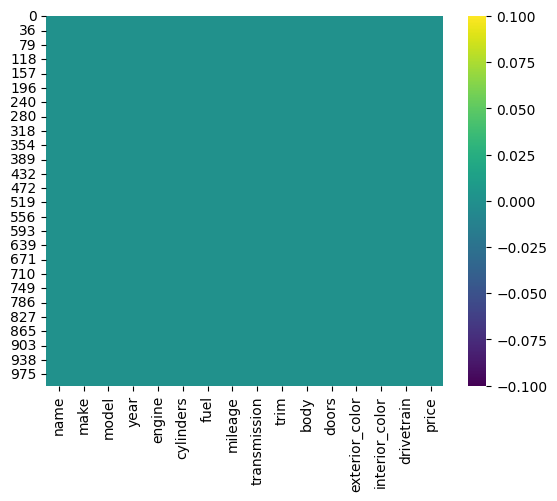

In [10]:
sns.heatmap(data.isnull(),color='red',cmap='viridis')
plt.show()

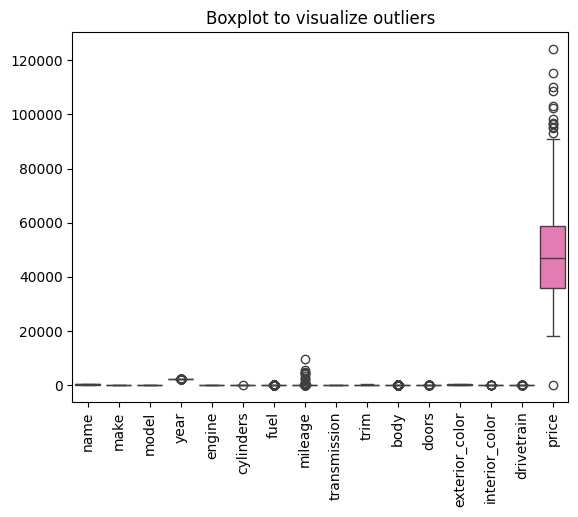

In [41]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title("Boxplot to visualize outliers")
plt.show()

In [47]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
data=data[~((data<l)|(data>u)).any(axis=1)]



In [48]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
outlier=((data<l)|(data>u))
outlier_counts = outlier.sum()
columns_with_outliers = outlier_counts[outlier_counts > 0]
columns_with_outliers



Series([], dtype: int64)

In [50]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 0 to 798
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            281 non-null    float64
 1   make            281 non-null    float64
 2   model           281 non-null    float64
 3   year            281 non-null    float64
 4   engine          281 non-null    float64
 5   cylinders       281 non-null    float64
 6   fuel            281 non-null    float64
 7   mileage         281 non-null    float64
 8   transmission    281 non-null    float64
 9   trim            281 non-null    float64
 10  body            281 non-null    float64
 11  doors           281 non-null    float64
 12  exterior_color  281 non-null    float64
 13  interior_color  281 non-null    float64
 14  drivetrain      281 non-null    float64
 15  price           281 non-null    float64
dtypes: float64(16)
memory usage: 37.3 KB


In [55]:
data=data.astype(int)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 0 to 798
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   name            281 non-null    int64
 1   make            281 non-null    int64
 2   model           281 non-null    int64
 3   year            281 non-null    int64
 4   engine          281 non-null    int64
 5   cylinders       281 non-null    int64
 6   fuel            281 non-null    int64
 7   mileage         281 non-null    int64
 8   transmission    281 non-null    int64
 9   trim            281 non-null    int64
 10  body            281 non-null    int64
 11  doors           281 non-null    int64
 12  exterior_color  281 non-null    int64
 13  interior_color  281 non-null    int64
 14  drivetrain      281 non-null    int64
 15  price           281 non-null    int64
dtypes: int64(16)
memory usage: 37.3 KB


In [54]:
data.to_csv(r"C:\Users\Avijit\Desktop\vehicle_price_prediction\src\model\dataset_final.csv",index=False)